In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from IPython.display import display, clear_output
import threading
import ipywidgets as widgets
import time

## Escape the Labyrinth

**Description:**

"Escape the Labyrinth" is an interactive text-based game that takes place in a mysterious and challenging maze. You find yourself trapped in a labyrinth with three key elements: yourself (YOU), a relentless monsters (M), and a potential escape route (EXIT). Your objective is simple: make your way through the maze to reach the exit while avoiding the monster at all costs. The game is played within the confines of a Jupyter Notebook, offering an engaging and visually appealing experience.

**Gameplay:**

Initialization: The game begins with the generation of a labyrinth consisting of interconnected nodes, which is displayed as a graph within the Jupyter Notebook. You are represented as 'YOU' (blue node), the monsters is represented as 'M' (red nodes), and the exit as 'EXIT' (green node).

Monster Movement: The monsters goal is to capture you. It relentlessly pursues you throughout the labyrinth by a shortest path.

Player Movement: Usualy you can move much faster then monsters and your win condition to kite them around and get to exit.

Objectives: Your primary objective is to make it to the 'EXIT' node, which will signify your successful escape from the labyrinth. Alternatively, if the 'M' node and 'YOU' node coincide, the monster captures you, and the game ends.

Visualization: The game features visualizations of the labyrinth graph with 'YOU,' 'M,' and 'EXIT' highlighted for easy tracking.

**Challenges:**

You need to strategize your moves to outmaneuver the monster while navigating the labyrinth.
Finding the right path to the 'EXIT' can be tricky, as the maze is designed to be a challenge.
Objective:

Your objective in "Escape the Labyrinth" is to successfully navigate the maze and reach the 'EXIT' node while avoiding capture by the 'M.' Use your wits, quick thinking, and strategic moves to outsmart the monster and secure your escape. Good luck, and may your decision-making skills lead you to victory in this thrilling adventure!

**HOW to PLAY:**

just run play_the_game function in the end of notebook. You will see graph, and now you need only input numbers of nodes connected to your where you want to move in. Reach exit and dont be captured by monsters.

Important notes: - the passages between the rooms of the maze are not always clearly visible. Each time you will need to indicate the node connected to you, if you indicate another one, you will simply lose your move. Also sometimes it may be impossible to run out of all monsters in this labirinth, just dont get sad and try again.

To have more fun you can change some game parametrs in
play_the_game function:
recomended params:
num_nodes = 30, num_monsters = 2, speed =4

num_of_nodes - determs size of labirinth. Logical minimum is around 15, maximum is inf, but if you put a realy big numbers here will be problems with visualization in jupyter notebook.

num_monsters = number of monsters generated against you.

speed = you speed agains monsters. For example if speed = 3 you can make 3 steps before each monster make one.








In [2]:
def visualize_graph(G, you_node, monsters_nodes, exit_node, pos):
    clear_output(wait=True)

    # Define node colors
    node_colors = []
    for node in G.nodes:
        if node == you_node:
            node_colors.append('blue')  # Color for "YOU"
        elif node in monsters_nodes:
            node_colors.append('red')  # Color for "MONSTER"
        elif node == exit_node:
            node_colors.append('green')  # Color for "EXIT"
        else:
            node_colors.append('gray')  # Color for other nodes

    # Draw nodes with different colors
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Label nodes
    labels = {node: node for node in G.nodes()}
    labels[you_node] ='YOU'
    for monster in monsters_nodes:
        labels[monster] ='M'
    labels[exit_node] = str(labels[exit_node])+'EXIT'
    nx.draw_networkx_labels(G, pos, labels)
    # Show the graph
    plt.axis("off")
    plt.show()


In [3]:
def create_labyrinth_web(num_nodes, n_monsters):
    while True:
        # Create a random connected graph
        G = nx.random_geometric_graph(num_nodes, radius=0.4)
        if nx.is_connected(G):

          monsters_nodes =[]
          you_node = 0

          # Find a random node at least 5 steps away for "MONSTER"
          monster_distance = 5
          possible_monster_nodes = [node for node in G.nodes if nx.shortest_path_length(G, source=you_node, target=node) >= monster_distance]
          if len(possible_monster_nodes) >n_monsters+1:
              for monster in range(n_monsters):
                monster_node = random.choice(possible_monster_nodes)
                possible_monster_nodes.remove(monster_node)
                monsters_nodes.append(monster_node)

              exit_node = random.choice(possible_monster_nodes)
              pos = nx.spring_layout(G)
              break
          else:
              continue


    return G, you_node, monsters_nodes, exit_node, pos


In [4]:
def monsters_move(G, you_node, monsters_nodes):
    new_monster_nodes =[]
    for monster_node in monsters_nodes:
      # Get the neighbors of the monster node
      monster_neighbors = list(G.neighbors(monster_node))

      # Find the neighbor closest to "YOU"
      closest_neighbor = None
      min_distance = float('inf')

      for neighbor in monster_neighbors:
          distance_to_you = nx.shortest_path_length(G, source=neighbor, target=you_node)
          if distance_to_you < min_distance:
              closest_neighbor = neighbor
              min_distance = distance_to_you

      # Move the monster to the closest neighbor
      G.nodes[monster_node]['type'] = 'empty'  # Clear the current monster node
      G.nodes[closest_neighbor]['type'] = 'monster'  # Set the new monster node
      monster_node = closest_neighbor

      # Check if the monster has captured "YOU"
      captured = (monster_node == you_node)
      new_monster_nodes.append(monster_node)

    return G,new_monster_nodes, captured




In [5]:
def move_you(G, you_node, monsters_nodes, exit_node, pos,num_nodes_to_move):
    if type(num_nodes_to_move) is not int:
      return G, you_node, False, False

    if G.has_edge(you_node, num_nodes_to_move):
        # Move "YOU" to the selected node
        G.nodes[you_node]['type'] = 'empty'  # Clear the current "YOU" node
        G.nodes[num_nodes_to_move]['type'] = 'you'  # Set the new "YOU" node
        you_node = num_nodes_to_move

        # Check if "YOU" has been captured by the monster
        captured = you_node in [monsters_nodes]

        # Check if "YOU" has reached the exit
        exited = you_node == exit_node

        return G, you_node, captured, exited
    else:
        # The selected node is not connected to "YOU"
        return G, you_node, False, False


In [6]:
def play_the_game(num_nodes = 30, num_monsters = 2, speed =4):
  exited = False
  captured = False

  labyrinth_graph, you_node, monsters_nodes, exit_node, pos = create_labyrinth_web(num_nodes,num_monsters )
  visualize_graph(labyrinth_graph, you_node, monsters_nodes, exit_node, pos)
  time.sleep(3)
  while exited==False and captured ==False:
    for i in range(speed):
      if not (exited==False and captured ==False):
        break
      try:
          user_response = int(input())
      except:
        print('Bad response. you just need to enter number of connected node to move in')
        user_response = 'bad'
      labyrinth_graph,you_node,captured, exited= move_you(labyrinth_graph, you_node, monsters_nodes, exit_node, pos,num_nodes_to_move=user_response)
      visualize_graph(labyrinth_graph, you_node, monsters_nodes, exit_node, pos)
    labyrinth_graph, monsters_nodes, captured = monsters_move(labyrinth_graph, you_node, monsters_nodes)
    visualize_graph(labyrinth_graph, you_node, monsters_nodes, exit_node, pos)

  if exited==True:
    print('YOU WON! CONGATULATIONS!')
  else:
    print('YOU GET CAPTURED AND KILLED')



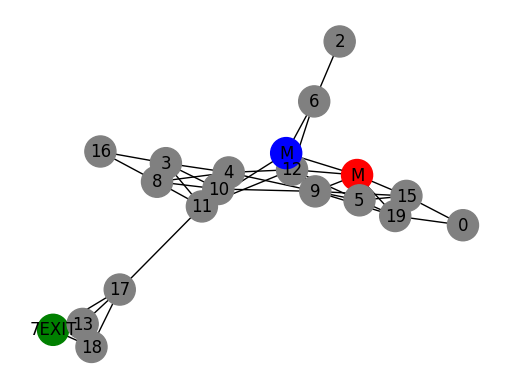

YOU GET CAPTURED AND KILLED


In [7]:
#try this params :
#num_nodes = 15, num_monsters = 2, speed =4
#num_nodes = 30, num_monsters = 3, speed =3
#num_nodes = 30, num_monsters = 12, speed =4
play_the_game(num_nodes = 20, num_monsters = 3, speed =4)